In [1]:
import spacy

In [2]:
nlp  = spacy.load('en_core_web_sm')

In [3]:
doc = nlp(u'tesla is looking at buying U.S stratup for $10 million')

In [4]:
for token in doc:
    print(token.text,token.pos_,token.dep_)

tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S PROPN compound
stratup NOUN dobj
for ADP prep
$ SYM quantmod
10 NUM compound
million NUM pobj


In [5]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x19af7ce8ee0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x19af4758ac0>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x19af4758a00>)]

In [6]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [7]:
doc[1].tag_

'VBZ'

In [8]:
doc1 = nlp(u'this is the first sentence. this is the another senttence. this is the last sentence')

In [9]:
for sentence in doc1.sents:
    print(sentence)

this is the first sentence.
this is the another senttence.
this is the last sentence


In [10]:
doc1[8]

the

In [11]:
doc1[2:5]

the first sentence

In [12]:
doc2 = nlp(u'Apple to build a Hong kong factory $6 Million ')

In [13]:
for token in doc2:
    print(token.text,end=' | ')

Apple | to | build | a | Hong | kong | factory | $ | 6 | Million | 

In [14]:
for entity in doc2.ents:
    print(entity)
    print(entity.label_)
    print(spacy.explain(entity.label_))
    print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Hong kong
GPE
Countries, cities, states


$6 Million
MONEY
Monetary values, including unit




In [15]:
for chunk in doc2.noun_chunks:
    print(chunk)

Apple
a Hong kong factory


In [16]:
from spacy import displacy

In [17]:
doc3 = nlp(u"Apple is going to build a U.K factory for $6 million")

In [18]:
displacy.render(doc3,style='dep',jupyter=True,options={'distance':100})

In [19]:
doc4 = nlp(u"I am runner runnig in a race because I love to run since ran today")

In [20]:
for token in doc4:
    print(token.text, '\t',token.pos_,'\t', token.lemma,'\t',token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 AUX 	 10382539506755952630 	 be
runner 	 PROPN 	 12640964157389618806 	 runner
runnig 	 PROPN 	 8425030056823529133 	 runnig
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [21]:
print(nlp.Defaults.stop_words)

{'so', 'done', 'take', 'already', 'except', 'noone', 'not', 'somehow', 'afterwards', 'some', 'without', '’re', 'about', 'must', 'get', 'namely', 'my', 'else', 'bottom', 'whereupon', 'although', 'anyhow', 'though', 'everywhere', 'everyone', 'has', '‘s', "'m", 'your', 'becoming', 'up', "'ve", 'five', 'really', 'show', 'even', 'move', 'whence', 'whole', 'nor', 'beyond', 'always', 'become', 'amongst', 'hereby', 'is', 'therein', 'fifteen', 'have', 'into', 'she', 'to', 'next', 'off', 'than', 'who', 'cannot', 'fifty', 'thence', 'herself', 'anything', 'throughout', 'did', 'when', 'whatever', 'upon', 'if', 'yet', 'could', "'s", "'d", 'across', 'doing', 'seem', 'toward', 'none', 'her', 'mine', 'further', 'alone', '’ve', 'n‘t', 'moreover', 'seems', 'per', 'any', 'mostly', 'anyway', 'after', 'are', 'rather', 'behind', 'might', 'thus', 'us', 'another', 'sometimes', 'for', 'anyone', 'just', 'around', 'however', 'forty', 'top', 'somewhere', 'something', '’ll', 'which', 'twelve', 'four', 'whoever', 'b

In [22]:
len(nlp.Defaults.stop_words)

326

In [23]:
nlp.vocab['father'].is_stop

False

In [24]:
nlp.Defaults.stop_words.add('abdur rahman')

In [25]:
nlp.vocab['abdur rahman'].is_stop = True

In [26]:
len(nlp.Defaults.stop_words)

327

In [27]:
nlp.vocab['abdur rahman'].is_stop

True

In [28]:
nlp.Defaults.stop_words.remove('abdur rahman')

In [29]:
nlp.vocab['abdur rahman'].is_stop = False

In [30]:
nlp.vocab['abdur rahman'].is_stop

False

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
x = iris.data
y =iris.target

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=4)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
training_accuracy = []
testing_accuracy= []

In [38]:
neighbors_settings = range(1,26)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    testing_accuracy.append(knn.score(X_test,y_test))

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

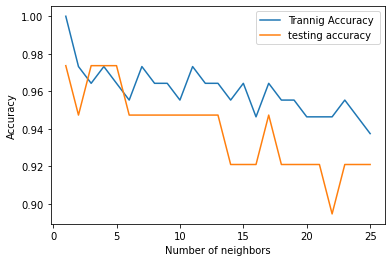

In [40]:
plt.plot(neighbors_settings,training_accuracy,   label = 'Trannig Accuracy ')
plt.plot(neighbors_settings,testing_accuracy, label ='testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()

In [41]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=4)

In [42]:
neibhors_settings = list(range(1,25))
scores = []


In [43]:
for k in neibhors_settings:
    knn1 = KNeighborsClassifier(n_neighbors=k) 
    knn1.fit(X_train,y_train)
    predictions = knn1.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,predictions))

Text(0, 0.5, 'testing accuracy')

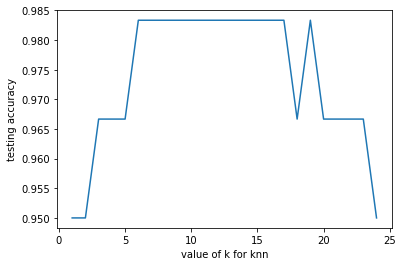

In [44]:
plt.plot(neibhors_settings,scores)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')


In [45]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
k_range = list(range(1,30))
k_score = []

In [47]:
for  k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn, x,y, cv=10,scoring='accuracy')
    k_score.append(scores.mean())

In [48]:
print(k_score)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'cores vallidation score')

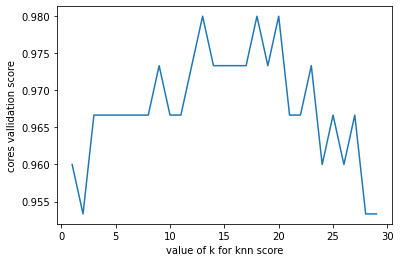

In [49]:
plt.plot(k_range,k_score)
plt.xlabel('value of k for knn score')
plt.ylabel('cores vallidation score')

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
sentence= [
    ' আমি বই পড়তে ভালোবাসি ',
    ' আমি ভালোবাসি বই লিখতে ',
    'বইমেলা আসলে আমি প্রচুর বই কিনি',
    'এবার বইমেলা তুমি কি আমার সাথে যাবে '
]

In [4]:
tokenizer =Tokenizer(num_words=100,filters='|')

In [5]:
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(sentence)

In [6]:
print('ওয়ার্ড ইনডেক্স :',word_index)
print('\nসিকোয়েন্স :',sequence)

ওয়ার্ড ইনডেক্স : {'আমি': 1, 'বই': 2, 'ভালোবাসি': 3, 'বইমেলা': 4, 'পড়তে': 5, 'লিখতে': 6, 'আসলে': 7, 'প্রচুর': 8, 'কিনি': 9, 'এবার': 10, 'তুমি': 11, 'কি': 12, 'আমার': 13, 'সাথে': 14, 'যাবে': 15}

সিকোয়েন্স : [[1, 2, 5, 3], [1, 3, 2, 6], [4, 7, 1, 8, 2, 9], [10, 4, 11, 12, 13, 14, 15]]


In [7]:
tokenizer.word_counts

OrderedDict([('আমি', 3),
             ('বই', 3),
             ('পড়তে', 1),
             ('ভালোবাসি', 2),
             ('লিখতে', 1),
             ('বইমেলা', 2),
             ('আসলে', 1),
             ('প্রচুর', 1),
             ('কিনি', 1),
             ('এবার', 1),
             ('তুমি', 1),
             ('কি', 1),
             ('আমার', 1),
             ('সাথে', 1),
             ('যাবে', 1)])

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
padded = pad_sequences(sequence,padding='post',truncating='post' ,maxlen=7)


print(padded)

[[ 1  2  5  3  0  0  0]
 [ 1  3  2  6  0  0  0]
 [ 4  7  1  8  2  9  0]
 [10  4 11 12 13 14 15]]


In [1]:
import re
import os
import glob
import string

In [3]:
from gensim.models import Word2Vec
from gensim.models import FastText



In [4]:
preprocessed_text_file_path = 'bnwiki-texts-preprocessed.txt'


In [8]:

lines_from_file = []
with open(preprocessed_text_file_path, encoding='utf8') as text_file:
    for line in text_file:
        lines_from_file.append(line)

In [11]:
len(lines_from_file)

1363435

In [14]:

tokenized_lines = []
for single_line in lines_from_file:
    tokenized_lines.append(single_line.split())

In [17]:
print(len(tokenized_lines))

1363435


In [36]:
print(tokenized_lines[100])

['মাতৃভাষীর', 'সংখ্যায়', 'বাংলা', 'ইন্দো', 'ইউরোপীয়', 'ভাষা', 'পরিবারের', 'চতুর্থ', 'ও', 'বিশ্বের', 'ষষ্ঠ', 'বৃহত্তম', 'ভাষা']


In [37]:
fasttext_model = FastText(tokenized_lines, size=200, window=5, min_count=10)
model = Word2Vec(tokenized_lines,size=200,window=5,min_count=10)

In [39]:
vector_a = fasttext_model.wv.get_vector('বাংলা')


In [40]:
print(vector_a)

[ 1.5861323   0.46432343  1.3519197  -1.1855215  -0.05259613  1.8764776
  0.24771474  2.3102443  -1.2054282  -1.8011212   0.02495607 -1.6818898
 -1.6341535   0.22244175  2.1703439  -1.004834    0.6365715   0.84147525
 -1.1072148   1.853618    0.08788633 -0.3133739   0.6036572  -0.43620613
 -0.12372344 -2.742187   -1.5163623   3.089589   -1.4551193  -1.5696206
  2.6325734  -4.3206944   0.8719889   0.78810793 -0.7229212   1.6849478
  1.6741294  -0.16513091  0.505395   -1.607841   -2.4809837   1.4578393
 -1.5084447  -2.0090506   0.4294255  -0.8200319  -3.52568    -0.22944745
 -2.3840864   0.48103225  2.3039844   2.426316   -0.56272775 -3.079408
 -1.6681768   1.5570793   1.2031081   3.3274057   0.22882083  0.48786074
  0.9595779  -1.0480741  -1.1239705   1.8178058  -0.9605784  -4.2007604
  1.2467979   1.2471142   2.724597   -0.75169754 -0.4200136  -1.7252322
 -1.5939187   0.8389292  -1.8886002  -0.1259972  -0.37290055 -1.307793
  2.2228303   1.5510007  -4.1773434   0.59781903  2.321639    

In [41]:
print("ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
model.wv.most_similar('ছেলে', topn=10)


ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('মেয়ে', 0.8735738396644592),
 ('বোন', 0.7863748073577881),
 ('ভাই', 0.7498878240585327),
 ('কন্যা', 0.7269225716590881),
 ('নাতি', 0.7193894386291504),
 ('পুত্র', 0.6975463628768921),
 ('সন্তান', 0.6948433518409729),
 ('নাতনী', 0.679440438747406),
 ('সৎভাই', 0.6720387935638428),
 ('দিদি', 0.6582993865013123)]

In [43]:
print('এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?')
fasttext_model.wv.doesnt_match("ঢাকা রাজশাহী রংপুর নজরুল".split())

এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?


'নজরুল'

In [44]:
print(fasttext_model.wv.similarity('ছেলে','ছেলেমেয়ে'))


0.862036


In [45]:
print("এখানে দেখি, রাজা + মহিলা - পুরুষ =?")
fasttext_model.wv.most_similar(positive=['রাজা', 'মহিলা'], negative=['পুরুষ'], topn=5)


এখানে দেখি, রাজা + মহিলা - পুরুষ =?


[('রাজাও', 0.6857993602752686),
 ('রাজাভি', 0.6847493648529053),
 ('রাজবিলা', 0.6745402216911316),
 ('রাজউক', 0.6740774512290955),
 ('রাজারত্নম', 0.6714142560958862)]

In [53]:
print("এখানে দেখি, বাবা + মেয়ে - ছেলে =?")
model.wv.most_similar(positive=['বাবা', 'মেয়ে'], negative=['ছেলে'], topn=15)


এখানে দেখি, বাবা + মেয়ে - ছেলে =?


[('মা', 0.7139177322387695),
 ('দাদা', 0.6449803113937378),
 ('পিতা', 0.640586256980896),
 ('পিতামাতা', 0.6189860105514526),
 ('মাতা', 0.6030683517456055),
 ('বান্ধবী', 0.6017350554466248),
 ('দাদী', 0.5968741178512573),
 ('খালা', 0.5936977863311768),
 ('গৃহিনী', 0.5911359786987305),
 ('শৈশবে', 0.5833880305290222),
 ('মাতামহী', 0.577360987663269),
 ('বাবার', 0.56426602602005),
 ('প্রেমিকা', 0.5631356835365295),
 ('গৃহিণী', 0.55936598777771),
 ('কাকা', 0.5573813915252686)]

In [54]:
print(fasttext_model.wv.similarity('শিক্ষা','অপবিত্র'))

0.32047108


In [55]:
print(fasttext_model.wv.similarity('ছেলে','বাবা'))

0.52109873


In [ ]:
from gtts import gTTS

In [9]:
eng = 'hello i welcome in this lession that i would rather not help me'

In [11]:
obj = gTTS(text=eng,slow=False,lang='en')

In [12]:
obj.save('eng.mp3')

In [59]:
print(fasttext_model.wv.similarity('ছেলে','বাবা'))

0.52109873


In [4]:
import spacy


In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
from spacy.matcher import Matcher

In [7]:
matcher = Matcher(nlp.vocab)

In [20]:
pattern1 = [{'LOWER':'solarpower'}]
pattern2 = [{'LOWER':'solar'},{'IS_PUNCT':True},{'LOWER':'power'}]
pattern3 = [{'LOWER':'solar'},{'LOWER':'power'}]

In [21]:
matcher.add('SolarPower',None,pattern1,pattern2,pattern3)

In [25]:
doc = nlp(u'The solar power industry continues to grow a solarpower increases. Solar-power is amazing')

In [26]:
fonud_match = matcher(doc)

In [32]:
print(fonud_match)

[(8656102463236116519, 1, 3), (8656102463236116519, 8, 9), (8656102463236116519, 11, 14)]


In [8]:
from spacy import displacy

In [9]:
import spacy
nlp = spacy.load("xx_ent_wiki_sm")
doc = nlp(u'আমি বাংলায় গান গাই। তুমি কি গাও?')



In [10]:
for token in doc:
    print(token.text,token.pos_,token.dep_)

আমি  
বাংলায়  
গান  
গাই  
।  
তুমি  
কি  
গাও  
?  


In [13]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':100})

In [14]:
import spacy
import bn_core_news_sm



In [15]:
nlp = bn_core_news_sm.load()


In [16]:
doc = nlp(u'আমি বাংলায় গান গাই। তুমি কি গাও?')


In [17]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':100})

In [18]:
for token in doc:
    print(token.text,token.pos_,token.dep_)

আমি PUNCT 
বাংলায় PUNCT 
গান PUNCT 
গাই PUNCT 
। PUNCT 
তুমি PUNCT 
কি PUNCT 
গাও PUNCT 
? PUNCT 


In [19]:
nlp =spacy.load('en_core_web_sm')

In [20]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [21]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':120})

In [22]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion , Tesla is the big company, Google is the  big company")


In [25]:
options = {'compact':True,'color':'yellow','bg':'blue','font':'Arial','distance':100}

displacy.render(doc,jupyter=True ,style='dep',options=options)

In [26]:
colors = {"ORG": "linear-gradient(blue,white,red)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(doc,style='ent',options=options)

In [27]:
option1 = {'color':'linear-gradient(blue,white,green)','bg':'black'}
displacy.render(doc,style='ent',options=option1)